In [6]:
from collections import defaultdict
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyprojroot

In [2]:
def get_results_dirs(net_name='alexnet'):
    return {
        'init': results_root / f'{net_name}_initialize_lr_1e-03_three_stims_38400samples_balanced',
        'tsfr': results_root / f'{net_name}_transfer_lr_1e-03_no_finetune_three_stims_38400samples_balanced',
    }

In [3]:
def get_results_dfs(results_dirs):
    results_dfs = {}

    for key, results_dir in results_dirs.items():
        results_csv = sorted(results_dir.glob('*.csv'))
        assert len(results_csv) == 1
        results_csv = results_csv[0]
        results_df = pd.read_csv(results_csv)
        results_dfs[key] = results_df
    
    return results_dfs

In [4]:
THIS_ACT = 'fc7'

def get_acts_by_training(act_to_use=THIS_ACT):
    acts_by_training = {}

    for training_key, results_df in results_dfs.items():
        acts = defaultdict(list)

        for y_true in results_df.y_true.unique():
            for set_size in results_df.set_size.unique():
                for correct in results_df.correct.unique():
                    this_df = results_df[
                        (results_df.y_true == y_true) &
                        (results_df.set_size == set_size) &
                        (results_df.correct == correct)
                    ]
                    key = f'y true: {y_true}, set size: {set_size}, correct: {correct}'
                    for npz_path in this_df.npz_path.values:
                        npz_path = pyprojroot.here() / npz_path
                        act_dict = np.load(npz_path)
                        act = act_dict[THIS_ACT]
                        acts[key].append(act)
        acts_by_training[training_key] = acts
    
    return acts_by_training

0.001

In [32]:
def plot_hist(acts, ax, n_samples=10, n_bins=250, min_bin_edge=10**-3, max_bin_edge=10**1.5):
    for case_key, list_of_vecs in acts.items():
#         acts_arr = np.array(list_of_vecs)
#         acts_mag = np.sqrt(np.sum(np.square(acts_arr),axis=1))
        
        if len(list_of_vecs) < n_samples:
            print(f"case '{case_key}' has less than {n_samples} samples")
            continue
        acts_sample = random.sample(list_of_vecs, n_samples)
        acts_arr = np.array(acts_sample)
        
        bins = 10 ** np.linspace(np.log10(min_bin_edge), np.log10(max_bin_edge), n_bins)
        
        acts_hist = np.histogram(acts_arr, bins=bins)

        ax.plot(acts_hist[1][1:], acts_hist[0].astype(np.float16) / max(acts_hist[0]), label=case_key)

In [38]:
np.logspace(-3, 1.5)

array([1.00000000e-03, 1.23548289e-03, 1.52641797e-03, 1.88586328e-03,
       2.32995181e-03, 2.87861559e-03, 3.55648031e-03, 4.39397056e-03,
       5.42867544e-03, 6.70703561e-03, 8.28642773e-03, 1.02377397e-02,
       1.26485522e-02, 1.56270698e-02, 1.93069773e-02, 2.38534401e-02,
       2.94705170e-02, 3.64103195e-02, 4.49843267e-02, 5.55773659e-02,
       6.86648845e-02, 8.48342898e-02, 1.04811313e-01, 1.29492584e-01,
       1.59985872e-01, 1.97659807e-01, 2.44205309e-01, 3.01711481e-01,
       3.72759372e-01, 4.60537826e-01, 5.68986603e-01, 7.02973212e-01,
       8.68511374e-01, 1.07303094e+00, 1.32571137e+00, 1.63789371e+00,
       2.02358965e+00, 2.50011038e+00, 3.08884360e+00, 3.81621341e+00,
       4.71486636e+00, 5.82513671e+00, 7.19685673e+00, 8.89159334e+00,
       1.09854114e+01, 1.35722878e+01, 1.67683294e+01, 2.07169840e+01,
       2.55954792e+01, 3.16227766e+01])

In [37]:
10 ** np.linspace(np.log10(10**-3), np.log10(10**1.5))

array([1.00000000e-03, 1.23548289e-03, 1.52641797e-03, 1.88586328e-03,
       2.32995181e-03, 2.87861559e-03, 3.55648031e-03, 4.39397056e-03,
       5.42867544e-03, 6.70703561e-03, 8.28642773e-03, 1.02377397e-02,
       1.26485522e-02, 1.56270698e-02, 1.93069773e-02, 2.38534401e-02,
       2.94705170e-02, 3.64103195e-02, 4.49843267e-02, 5.55773659e-02,
       6.86648845e-02, 8.48342898e-02, 1.04811313e-01, 1.29492584e-01,
       1.59985872e-01, 1.97659807e-01, 2.44205309e-01, 3.01711481e-01,
       3.72759372e-01, 4.60537826e-01, 5.68986603e-01, 7.02973212e-01,
       8.68511374e-01, 1.07303094e+00, 1.32571137e+00, 1.63789371e+00,
       2.02358965e+00, 2.50011038e+00, 3.08884360e+00, 3.81621341e+00,
       4.71486636e+00, 5.82513671e+00, 7.19685673e+00, 8.89159334e+00,
       1.09854114e+01, 1.35722878e+01, 1.67683294e+01, 2.07169840e+01,
       2.55954792e+01, 3.16227766e+01])

In [30]:
results_root = pyprojroot.here() / 'results' / 'searchstims' / 'activations' / '3stims'

case 'y true: 1, set size: 1, correct: False' has less than 50 samples
case 'y true: 0, set size: 1, correct: False' has less than 50 samples
case 'y true: 0, set size: 2, correct: False' has less than 50 samples


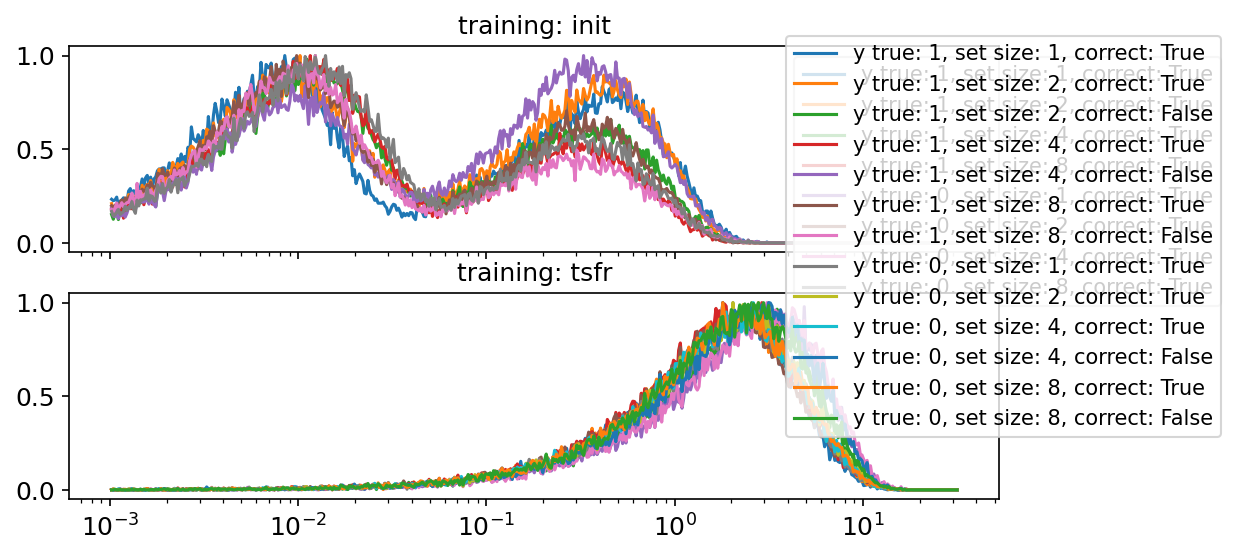

case 'y true: 1, set size: 2, correct: False' has less than 50 samples
case 'y true: 1, set size: 4, correct: False' has less than 50 samples
case 'y true: 0, set size: 1, correct: False' has less than 50 samples
case 'y true: 0, set size: 2, correct: False' has less than 50 samples


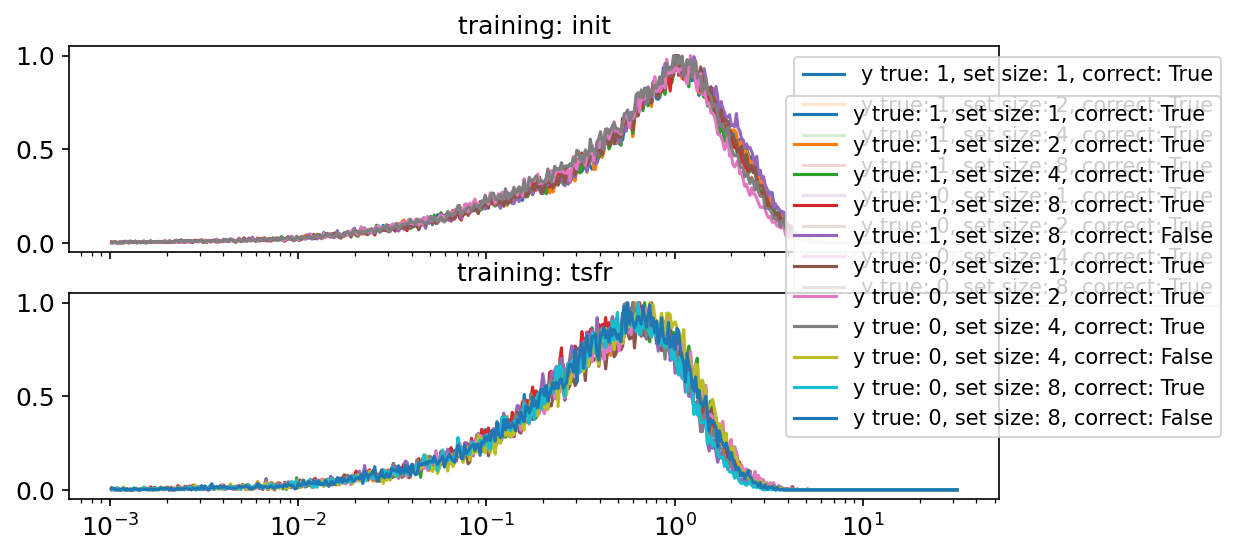

In [39]:
BINS = 500

for net_name in ('alexnet', 'VGG16'):
    results_dirs = get_results_dirs(net_name)
    results_dfs = get_results_dfs(results_dirs)
    acts_by_training = get_acts_by_training(results_dfs)

    fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True, dpi=150)

    for ind, (training, acts) in  enumerate(acts_by_training.items()):
        ax = axes[ind]
        plot_hist(acts, ax, n_bins=BINS, n_samples=50)
        ax.tick_params(axis='both', which='major', labelsize=12)
        if ind == 0:
            ax.legend(bbox_to_anchor=[1.25, 1.0], loc='upper right')
        else:
            ax.legend(bbox_to_anchor=[1.25, 0.25], loc='lower right')
        ax.set_title(f'training: {training}')
    #axes[0].set_xlim([10**-1,10**3])

    plt.xscale('log')
    # plt.tight_layout()

    # plt.savefig(file_name.cformat('Hist','pdf'),bbox_inches='tight')
    plt.show()

Shouldn't be surprising that distributions of values aren't clearly different.
More likely to be about something like distances between classes